# COLOR MODELS
3. HSI

Converting RGB to HSI and showing S H I planes



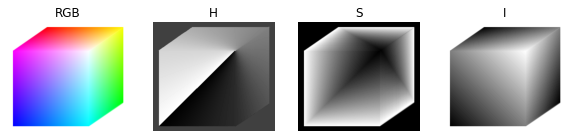

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

rgb_image = cv2.imread('Fig0608(RGB-full-color-cube).tif')
r_channel = rgb_image[:, :, 2]
g_channel = rgb_image[:, :, 1]
b_channel = rgb_image[:, :, 0]
r = r_channel / 255
g = g_channel / 255
b = b_channel / 255

def create_hsi (r,g,b):
  # H
  numerator = ((r-g) + (r-b)) / 2
  denominator = np.sqrt(0.0000001+((np.power(r-g,2))+((r-b)*(g-b))))
  theta = numerator / (denominator)
  theta = np.degrees(np.arccos(theta))
  h = np.zeros_like(theta)
  h[b <= g] = theta[b <= g]
  h[b > g] = 360 - theta[b > g]
  h = (h / 360) * 255

  # S
  denominator = r + g + b
  min_rgb = np.minimum.reduce([r,g,b])
  s = (1 - (3 / denominator) * min_rgb) * 255

  # I
  i = ((r + g + b) / 3) * 255

  return [h,s,i]

# Convert HSI to RGB
def convert_hsi2rgb(hue,sat,inten):
  hue = (hue / 255) * 360
  sat = sat / 255
  inten = inten / 255
  r,g,b = np.zeros_like(hue),np.zeros_like(hue),np.zeros_like(hue)
  for x in range(hue.shape[0]):
    for y in range(hue.shape[1]):
      h = hue[x,y]
      s = sat[x,y]
      i = inten[x,y]
      if h >= 0 and h < 120:
        b[x,y] = i * (1-s)
        r[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        g[x,y] = (3*i) - (r[x,y] + b[x,y])
      elif h >= 120 and h < 240:
        h = h - 120
        r[x,y] = i * (1-s)
        g[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        b[x,y] = (3*i) - (r[x,y] + g[x,y])
      else:
        h = h - 240
        g[x,y] = i * (1-s)
        b[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        r[x,y] = (3*i) - (b[x,y] + g[x,y])

  r , g , b = r * 255, g * 255, b * 255
  return np.stack((b,g,r),axis = -1)

def show(images,titles):
  plt.figure(figsize = (10,20))
  for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i],cmap = 'gray')
    plt.title(titles[i])
    plt.axis('off')


h,s,i =  create_hsi(r,g,b)
images = [rgb_image,h,s,i]
titles = ['RGB','H','S','I']
show(images,titles)

# PSEUDOCOLOR IMAGE PROCESSING
INTENSITY SLICING AND COLOR CODING

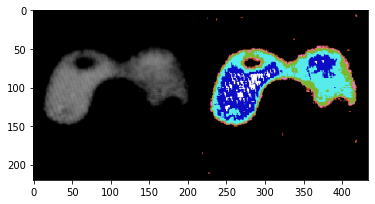

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
red = np.full((1, 1, 3), [12, 12, 196], dtype=np.int8)
yellow = np.full((1, 1, 3), [87, 235, 235], dtype=np.int8)
blue = np.full((1, 1, 3), [184, 78, 46], dtype=np.int8)
cyan = np.full((1, 1, 3), [184, 154, 46], dtype=np.int8)
green = np.full((1, 1, 3), [124, 184, 46], dtype=np.int8)
purple = np.full((1, 1, 3), [240, 122, 220], dtype=np.int8)
white = np.full((1, 1, 3), [255, 255, 255], dtype=np.int8)
original_image = cv2.imread('Fig0620(a)(picker_phantom).tif')
height, width, channels = original_image.shape
gray_image = cv2.imread('Fig0620(a)(picker_phantom).tif', cv2.IMREAD_GRAYSCALE)
plane1 = np.full((gray_image.shape),0, dtype = gray_image.dtype)
plane2 = np.full((gray_image.shape),10, dtype = gray_image.dtype)
plane3 = np.full((gray_image.shape),20, dtype = gray_image.dtype)
plane4 = np.full((gray_image.shape),30, dtype = gray_image.dtype)
plane5 = np.full((gray_image.shape),60, dtype = gray_image.dtype)
plane6 = np.full((gray_image.shape),100, dtype = gray_image.dtype)
plane7 = np.full((gray_image.shape),126, dtype = gray_image.dtype)

rgb_image = np.zeros_like(original_image)
rgb_image[gray_image > plane1] = blue
rgb_image[gray_image > plane2] = purple
rgb_image[gray_image > plane3] = cyan
rgb_image[gray_image > plane4] = green
rgb_image[gray_image > plane5] = yellow
rgb_image[gray_image > plane6] = red
rgb_image[gray_image > plane7] = white

plt.imshow(cv2.hconcat([original_image,rgb_image]));

COLOR CODING OF MULTISPECTRAL IMAGES

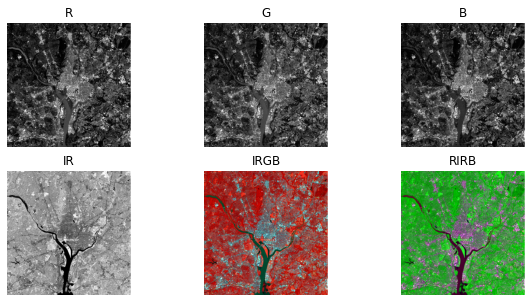

In [11]:
r = cv2.imread('Fig0627(a)(WashingtonDC Band3-RED).TIF',cv2.IMREAD_GRAYSCALE)
g = cv2.imread('Fig0627(b)(WashingtonDC Band2-GREEN).TIF',cv2.IMREAD_GRAYSCALE)
b = cv2.imread('Fig0627(c)(1)(WashingtonDC Band1-BLUE).TIF',cv2.IMREAD_GRAYSCALE)
ir = cv2.imread('Fig0627(d)(WashingtonDC Band4).TIF',cv2.IMREAD_GRAYSCALE)

# for showing we will same the data types of each color span
r = r.astype(dtype = np.int64)
g = g.astype(dtype = np.int64)
b = b.astype(dtype = np.int64)
ir = ir.astype(dtype = np.int64)
height,width = r.shape
rgb_image1 = np.zeros((1024,1026,3),dtype = r.dtype)
rgb_image1[:,:,0] = ir
rgb_image1[:,:,1] = g
rgb_image1[:,:,2] = b

rgb_image2 = np.zeros_like(rgb_image1)
rgb_image2[:,:,0] = r
rgb_image2[:,:,1] = ir
rgb_image2[:,:,2] = b


def show(height,width,images, titles):
  plt.figure(figsize = (10,5))
  for i in range(len(images)):
    plt.subplot(height,width,i+1)
    if i <= 3:
      plt.imshow(images[i], cmap = 'gray')
    else :
      plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

images = [r,g,b,ir,rgb_image1,rgb_image2]
titles = ['R','G','B','IR','IRGB','RIRB']
show(2,3,images,titles)

# COLOR TRANSFORMATION
1. FORMULATION s[i] = T[i] (r[i]) i = 1,2,3...n

where n is the total number of component images,
r[i] are the intensity values of the input component images,
s[i] are the spatially corresponding intensities in the output images and
T[i] are the set of Transformation or color mapping functions that operate on r[i] to producce s[i].

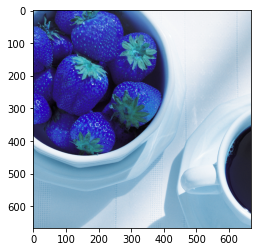

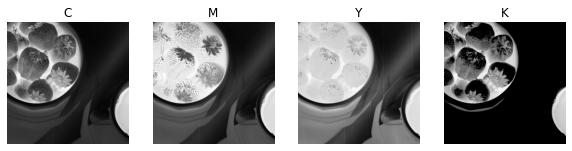

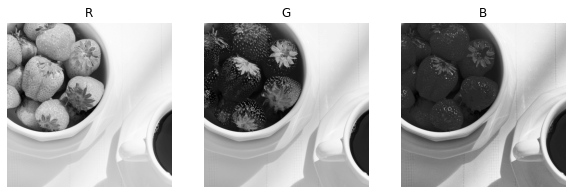

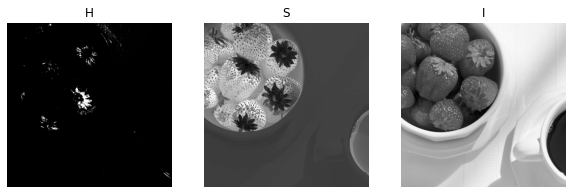

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def show(height,width,images, titles):
  plt.figure(figsize = (10,5))
  for i in range(len(images)):
    plt.subplot(height,width,i+1)
    plt.imshow(images[i], cmap = 'gray')
    plt.title(titles[i])
    plt.axis('off')

original_image = cv2.imread('Fig0630(01)(strawberries_fullcolor).tif')
# As the image is in RGB we have to convert it into CMY
# and then from CMY we have to find the K component which makes CMYK image
r = original_image[:,:,2]
g = original_image[:,:,1]
b = original_image[:,:,0]

#CMY
def create_cmy (r,g,b):
  c = 1 - r
  m = 1 - g
  y = 1 - b
  return [c*255,m*255,y*255]


c,m,y = create_cmy(r/255,g/255,b/255)


# Now Create K component of CMYK
def create_k(c,m,y):
  c_k = c / 255
  m_k = m / 255
  y_k = y / 255
  min = np.minimum(c_k,m_k,y_k)
  return min


k = create_k(c,m,y) * 255
k[k<80]= 0

# Convert CMY to RGB
def convert_cmy2rgb(c,m,y):
  r,g,b = 1 - c , 1 - m, 1 - y
  return np.stack((b*255,g*255,r*255), axis = -1)

def create_hsi(r, g, b):
    i = (r + g + b) / 3.0
    s = 1 - np.minimum(r, g, b) / i
    h = np.arccos((0.5 * ((r - g) + (r - b))) / (np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-6))
    h[b > g] = 2 * np.pi - h[b > g]
    h = h / (2 * np.pi)
    return [h * 255, s * 255, i * 255]

# Create HSI
h,s,i = create_hsi(r = r / 255,g = g / 255,b = b / 255)
plt.imshow(original_image)

def convert_cmyk2cmy(c,m,y,k):
  c = c * (1-k) + k
  m = m * (1-k) + k
  y = y * (1-y) + k
  return [y*255,m*255,c*255]
# show CMYK
show(1,4,[c,m,y,k],['C','M','Y','K'])
# show RGB
show(1,3,[r,g,b],['R','G','B'])
#show HSI
show(1,3,[h,s,i],['H','S','I'])

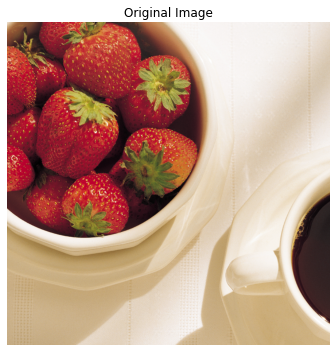

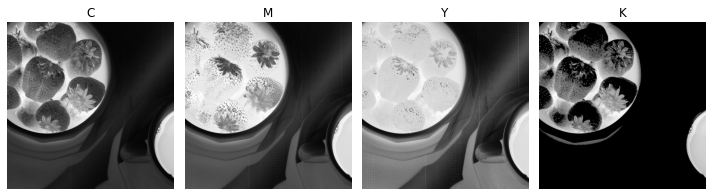

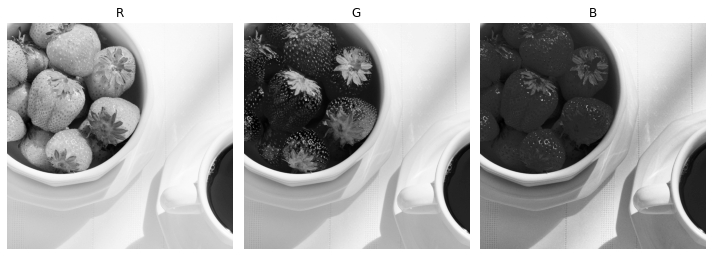

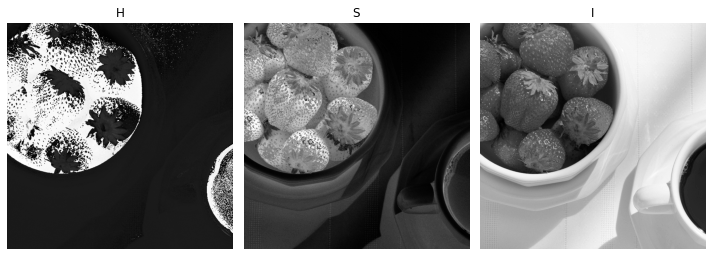

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Function to display images
def show(height, width, images, titles, cmap=None):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(height, width, i + 1)
        if cmap is None:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Read the original image
original_image = cv2.imread('Fig0630(01)(strawberries_fullcolor).tif')

# Separate the RGB channels
r = original_image[:, :, 2] / 255.0
g = original_image[:, :, 1] / 255.0
b = original_image[:, :, 0] / 255.0

# Create CMY components
c = (1 - r) * 255
m = (1 - g) * 255
y = (1 - b) * 255

# Create K component of CMYK
k = np.minimum(c, np.minimum(m, y))
k[k < 80] = 0

# Create HSI components (simplified)
i = (r + g + b) / 3.0
s = 1 - np.minimum(r, np.minimum(g, b)) / (i + 1e-6)
h = np.arccos((0.5 * ((r - g) + (r - b))) / (np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-6))
h[b > g] = 2 * np.pi - h[b > g]
h = h / (2 * np.pi) * 255
s = s * 255
i = i * 255

# Convert float to uint8
c, m, y, k = c.astype(np.uint8), m.astype(np.uint8), y.astype(np.uint8), k.astype(np.uint8)
h, s, i = h.astype(np.uint8), s.astype(np.uint8), i.astype(np.uint8)

# Display the images
show(1, 1, [original_image], ['Original Image'])
show(1, 4, [c, m, y, k], ['C', 'M', 'Y', 'K'], cmap='gray')
show(1, 3, [r * 255, g * 255, b * 255], ['R', 'G', 'B'], cmap='gray')
show(1, 3, [h, s, i], ['H', 'S', 'I'], cmap='gray')



Transformation functions of the different color models space

In [3]:
k = 0.7
# For RGB
def transform_rgb (original_image,k):
  r = original_image[:,:,2]
  g = original_image[:,:,1]
  b = original_image[:,:,0]
  r = [r,g,b]
  output_image = np.zeros_like(original_image)
  for i in range(3):
    output_image[:,:,2-i] = r[i] * k
  return output_image

# For HSI
def transform_hsi(image,k):
    r = image[:,:,2] / 255
    g = image[:,:,1] / 255
    b = image[:,:,0] / 255
    h,s,i = create_hsi(r,g,b)
    i = i  * k
    return convert_hsi2rgb(h,s,i)

# For CMY
def transform_cmy(image,k):
    r = image[:,:,2] / 255
    g = image[:,:,1] / 255
    b = image[:,:,0] / 255

    c,m,y = 1-r, 1-g, 1-b
    c = c * k
    m = m * k
    y = y * k
    return convert_cmy2rgb(c,m,y)

# For SMYK
def transform_cmyk(image,k):
    r = image[:,:,2] / 255
    g = image[:,:,1] / 255
    b = image[:,:,0] / 255
    c,m,y = create_cmy(r,g,b)
    k_v = create_k(c,m,y) * 255
    k_v[k_v<80] = 0
    k_v /= 255
    k_v = (k * k_v) + (1 - k)
    c = c * k_v
    m = m * k_v
    y = y - k_v
    c = np.where((k_v==1),0,(c-k)/(1-k))
    m = np.where((k_v==1),0,(m-k)/(1-k))
    y = np.where((k_v==1),0,(y-k)/(1-k))
    #c,m,y =  convert_cmyk2cmy(c/255,m/255,y/255,k_v)
    return convert_cmy2rgb(c/255,m/255,y/255)



trans_rgb = transform_rgb(original_image,k)
trans_hsi= transform_hsi(original_image,k)
trans_cmy = transform_cmy(original_image,k)
trans_cmyk = transform_cmyk(original_image,k)


row1 = cv2.hconcat([original_image,trans_rgb])
plt.imshow(row1)
plt.imshow(trans_hsi)
plt.imshow(trans_cmyk)

NameError: name 'create_hsi' is not defined

3. COLOR SLICING

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Cube
Sphere


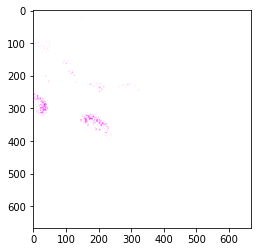

In [6]:
original_image = cv2.imread('Fig0630(01)(strawberries_fullcolor).tif')
rgb_color = np.full((1,1,3),[0.1922,0.1608,0.6863])
cube_width = 0.2549
sphere_radius = 0.1765

def color_slicing_cube(image,width,prot_color):
  image = image / 255
  diff = np.abs(image - prot_color)
    # Create the boolean mask
  mask = np.any(diff > (width / 2), axis=-1, keepdims=True)
  output_image = np.where(mask, 0.5, image)
    return output_image * 255

def color_slicing_sphere(image,radius,prot_color):
  image = image / 255
  diff = np.power((image - prot_color),2)
  mask = np.any(diff > np.power(radius,2), axis = -1, keepdims = True)
  output_image = np.where(mask,0.5,image)
  return output_image * 255

cube = color_slicing_cube(original_image,cube_width,rgb_color)
sphere = color_slicing_sphere(original_image,sphere_radius,rgb_color)
print('Cube')
plt.imshow(cube)
print('Sphere')
plt.imshow(sphere)

TONE AND COLOR CORRECTIONS

TONAL TRANSFORMATION

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


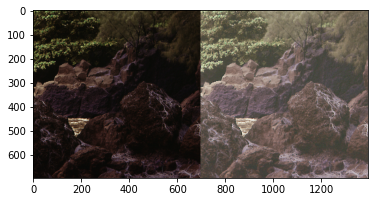

In [7]:
flat_image = cv2.imread('Fig0635(top_ left_flower).tif')
light_image = cv2.imread('Fig0635(middle_row_left_chalk ).tif')
dark_image = cv2.imread('Fig0635(bottom_left_stream).tif')

def contrast_adjusting(image,fact):
  r,g,b = image[:,:,2],image[:,:,1],image[:,:,0]
  mean_r,mean_g,mean_b = np.mean(r), np.mean(g), np.mean(b)
  r = ((r - mean_r) * fact) + mean_r
  g = ((g - mean_g) * fact) + mean_g
  b = ((b - mean_b) * fact) + mean_b
  return np.stack((b,g,r), axis = -1)

def power_law(image,gamma):
  image = image / 255
  output_image = np.zeros_like(image)
  for dim in range(3):
    output_image[:,:,dim] = np.power(image[:,:,dim],gamma)

  output_image = np.clip(output_image,0,1)
  return output_image * 255
flat_image = flat_image.astype(np.float64)
flat_trans = contrast_adjusting(flat_image, 1.5).astype(flat_image.dtype)
light_trans = power_law(light_image,2.5).astype(light_image.dtype)
dark_trans = power_law(dark_image,0.4).astype(dark_image.dtype)
plt.imshow(cv2.hconcat([flat_image,flat_trans]))
plt.imshow(cv2.hconcat([light_image,light_trans]))
plt.imshow(cv2.hconcat([dark_image,dark_trans]))

COLOR BALANCING

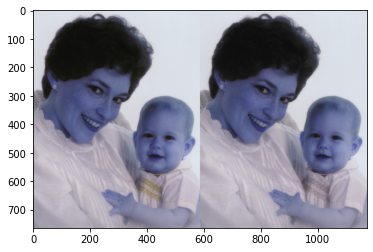

In [8]:
def rgb_to_cmy(rgb_image):

    # Normalize RGB values to range [0, 1]
    rgb_normalized = rgb_image / 255.0

    # Extract R, G, B channels
    R = rgb_normalized[..., 0]
    G = rgb_normalized[..., 1]
    B = rgb_normalized[..., 2]

    # Calculate CMY values
    C = 1 - R
    M = 1 - G
    Y = 1 - B

    # Scale CMY values to range [0, 255]
    C = (C * 255).astype(np.uint8)
    M = (M * 255).astype(np.uint8)
    Y = (Y * 255).astype(np.uint8)

    # Stack CMY channels
    cmy_array = np.stack((C, M, Y), axis=-1)

    return cmy_array

def cmy_to_cmyk(cmy_array):
    # Normalize CMY values to range [0, 1]
    cmy_array_normalized = cmy_array / 255.0

    # Extract C, M, Y channels
    C = cmy_array_normalized[..., 0]
    M = cmy_array_normalized[..., 1]
    Y = cmy_array_normalized[..., 2]

    # Calculate K values
    K = np.minimum(np.minimum(C, M), Y)

    # Calculate CMYK values
    C = (C - K) / (1 - K + 1e-15)
    M = (M - K) / (1 - K + 1e-15)
    Y = (Y - K) / (1 - K + 1e-15)

    # Scale CMYK values to range [0, 255]
    C = (C * 255).astype(np.uint8)
    M = (M * 255).astype(np.uint8)
    Y = (Y * 255).astype(np.uint8)
    K = (K * 255).astype(np.uint8)

    # Stack CMYK channels
    cmyk_array = np.stack((C, M, Y, K), axis=-1)

    return cmyk_array,k

def cmyk_to_cmy(cmyk_array):
    # Normalize CMYK values to range [0, 1]
    cmyk_array_normalized = cmyk_array / 255.0

    # Extract C, M, Y, K channels
    C = cmyk_array_normalized[..., 0]
    M = cmyk_array_normalized[..., 1]
    Y = cmyk_array_normalized[..., 2]
    K = cmyk_array_normalized[..., 3]

    # Calculate CMY values
    C = C * (1 - K) + K
    M = M * (1 - K) + K
    Y = Y * (1 - K) + K

    # Scale CMY values to range [0, 255]
    C = (C * 255).astype(np.uint8)
    M = (M * 255).astype(np.uint8)
    Y = (Y * 255).astype(np.uint8)

    # Stack CMY channels
    cmy_array = np.stack((C, M, Y), axis=-1)

    return cmy_array

def cmy_to_rgb(cmy_array):
    # Normalize CMY values to range [0, 1]
    cmy_array_normalized = cmy_array / 255.0

    # Extract C, M, Y channels
    C = cmy_array_normalized[..., 0]
    M = cmy_array_normalized[..., 1]
    Y = cmy_array_normalized[..., 2]

    # Calculate RGB values
    R = 1 - C
    G = 1 - M
    B = 1 - Y

    # Scale RGB values to range [0, 255]
    R = (R * 255).astype(np.uint8)
    G = (G * 255).astype(np.uint8)
    B = (B * 255).astype(np.uint8)

    # Stack RGB channels
    rgb_array = np.stack((R, G, B), axis=-1)

    return rgb_array

def power_law(comp,gamma):
  comp = comp / 255
  trans_comp = np.power(comp,gamma)
  trans_comp = np.clip(trans_comp,0,1)
  return trans_comp * 255

original_image = cv2.imread('Fig0636(woman_baby_original).tif')
r,g,b = original_image[:,:,2] / 255, original_image[:,:,1] / 255, original_image[:,:,0] / 255
cmy_image = rgb_to_cmy(original_image)
cmyk_image ,k = cmy_to_cmyk(cmy_image)

# K varing
k = cmyk_image[..., 3]
h_cmyk = np.copy(cmyk_image)
w_cmyk = np.copy(cmyk_image)
k_heavy = power_law(k,0.5) # if we give small value then dark will be greater so the net result will be dark
k_weak = power_law(k,1.5)
h_cmyk[...,3] = k_heavy
w_cmyk[...,3] = k_weak
h_cmy = cmyk_to_cmy(h_cmyk)
w_cmy = cmyk_to_cmy(w_cmyk)
h_rgb = cmy_to_rgb(h_cmy)
w_rgb = cmy_to_rgb(w_cmy)

plt.imshow(cv2.hconcat([h_rgb,w_rgb]))

# C varing
k = cmyk_image[..., 0]
h_cmyk = np.copy(cmyk_image)
w_cmyk = np.copy(cmyk_image)
c_heavy = power_law(k,2)
c_weak = power_law(k,0.5)
h_cmyk[...,0] = c_heavy
w_cmyk[...,0] = c_weak
h_cmy = cmyk_to_cmy(h_cmyk)
w_cmy = cmyk_to_cmy(w_cmyk)
h_rgb = cmy_to_rgb(h_cmy)
w_rgb = cmy_to_rgb(w_cmy)
plt.imshow(cv2.hconcat([h_rgb, w_rgb]))

# M varring
k = cmyk_image[..., 1]
h_cmyk = np.copy(cmyk_image)
w_cmyk = np.copy(cmyk_image)
m_heavy = power_law(k,0.5)
m_weak = power_law(k,2)
h_cmyk[...,1] = m_heavy
w_cmyk[...,1] = m_weak
h_cmy = cmyk_to_cmy(h_cmyk)
w_cmy = cmyk_to_cmy(w_cmyk)
h_rgb = cmy_to_rgb(h_cmy)
w_rgb = cmy_to_rgb(w_cmy)
plt.imshow(cv2.hconcat([h_rgb, w_rgb]))
# # Y varring
k = cmyk_image[..., 2]
h_cmyk = np.copy(cmyk_image)
w_cmyk = np.copy(cmyk_image)
y_heavy = power_law(k,0.5)
y_weak = power_law(k,2)
h_cmyk[...,2] = y_heavy
w_cmyk[...,2] = y_weak
h_cmy = cmyk_to_cmy(h_cmyk)
w_cmy = cmyk_to_cmy(w_cmyk)
h_rgb = cmy_to_rgb(h_cmy)
w_rgb = cmy_to_rgb(w_cmy)
plt.imshow(cv2.hconcat([h_rgb, w_rgb]));


HISTOGRAM PROCESSING OF COLOR IMAGES

Histogram equalization in the HSI color space

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


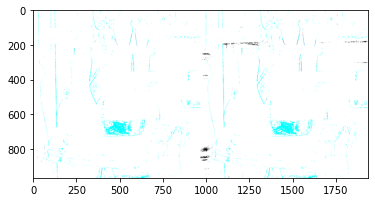

In [14]:
def hist_equal(image_comp, L = 256):
    pixels, nk = np.unique(image_comp, return_counts = True)
    m,n = image_comp.shape
    mn = m*n
    pr_rk = []
    for n in nk:
      pr_rk.append(n/mn)
    cdf = []
    temp = 0
    for i,val in enumerate(pr_rk):
      temp = temp + val
      cdf.append(temp)
    summation = dict(zip(pixels, cdf))
    equalized_image_comp = np.zeros_like(image_comp)
    for (h,w),x in np.ndenumerate(image_comp):
        equalized_image_comp[h][w] = np.floor((L-1)*summation[x])
    return equalized_image_comp

def create_hsi (r,g,b):
  r = r / 255
  g = g / 255
  b = b / 255
  # H
  numerator = ((r-g) + (r-b)) / 2
  denominator = np.sqrt(0.0000001+((np.power(r-g,2))+((r-b)*(g-b))))
  theta = numerator / (denominator + 1e-15 )
  theta = np.degrees(np.arccos(theta))
  h = np.zeros_like(theta)
  h[b <= g] = theta[b <= g]
  h[b > g] = 360 - theta[b > g]
  h = (h / 360)
  h = np.clip(h,0,1)
  h *= 255

  # S
  denom = r + g + b
  min_rgb = np.minimum.reduce([r,g,b])
  s = 1 - (3 / (denom + 1e-10)) * min_rgb
  s = np.clip(s,0,1)
  s *= 255

  # I
  i = (r + g + b) / 3
  i = np.clip(i,0,1)
  i *= 255

  return [h,s,i]

# Convert HSI to RGB
def convert_hsi2rgb(hue,sat,inten):
  hue = (hue / 255) * 360
  sat = sat / 255
  inten = inten / 255
  r,g,b = np.zeros_like(hue),np.zeros_like(hue),np.zeros_like(hue)
  for x in range(hue.shape[0]):
    for y in range(hue.shape[1]):
      h = hue[x,y]
      s = sat[x,y]
      i = inten[x,y]
      if h >= 0 and h < 120:
        b[x,y] = i * (1-s)
        r[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        g[x,y] = (3*i) - (r[x,y] + b[x,y])
      elif h >= 120 and h < 240:
        h = h - 120
        r[x,y] = i * (1-s)
        g[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        b[x,y] = (3*i) - (r[x,y] + g[x,y])
      else:
        h = h - 240
        g[x,y] = i * (1-s)
        b[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        r[x,y] = (3*i) - (b[x,y] + g[x,y])

  r , g , b = np.clip(r,0,1) * 255, np.clip(g,0,1) * 255, np.clip(b,0,1) * 255
  return np.stack((b,g,r),axis = -1)



original_image = cv2.imread('Fig0637(a)(caster_stand_original).tif')
r,g,b = original_image[...,2],original_image[...,1],original_image[...,0]
h,s,i = create_hsi(r,g,b)
equalized_i = hist_equal(i)
rgb = convert_hsi2rgb(h,s,equalized_i)
original_image = original_image.astype(rgb.dtype)
plt.imshow(cv2.hconcat([original_image,rgb]))

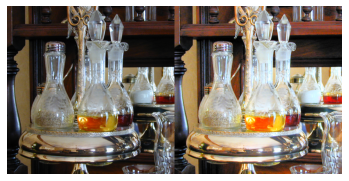

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hist_equal(image_comp, L=256):
    # Perform histogram equalization on a single channel image component
    pixels, nk = np.unique(image_comp, return_counts=True)
    m, n = image_comp.shape
    mn = m * n
    pr_rk = nk / mn  # Probability distribution
    cdf = np.cumsum(pr_rk)  # Cumulative distribution function
    summation = dict(zip(pixels, cdf))
    
    equalized_image_comp = np.zeros_like(image_comp)
    for (h, w), x in np.ndenumerate(image_comp):
        equalized_image_comp[h, w] = np.floor((L-1) * summation[x])
    return equalized_image_comp

def create_hsi(r, g, b):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    numerator = ((r - g) + (r - b)) / 2
    denominator = np.sqrt((r - g)**2 + (r - b) * (g - b)) + 1e-10
    theta = np.arccos(numerator / denominator)
    h = np.degrees(theta)
    h[b > g] = 360 - h[b > g]
    h = (h / 360) * 255
    
    denom = r + g + b
    min_rgb = np.minimum.reduce([r, g, b])
    s = 1 - (3 / (denom + 1e-10)) * min_rgb
    s = np.clip(s, 0, 1) * 255
    
    i = (r + g + b) / 3 * 255
    
    return h.astype(np.uint8), s.astype(np.uint8), i.astype(np.uint8)

def convert_hsi2rgb(hue, sat, inten):
    hue = (hue / 255.0) * 360
    sat = sat / 255.0
    inten = inten / 255.0
    
    r, g, b = np.zeros_like(hue), np.zeros_like(hue), np.zeros_like(hue)
    for x in range(hue.shape[0]):
        for y in range(hue.shape[1]):
            h, s, i = hue[x, y], sat[x, y], inten[x, y]
            if 0 <= h < 120:
                b[x, y] = i * (1 - s)
                r[x, y] = i * (1 + (s * np.cos(np.radians(h))) / np.cos(np.radians(60 - h)))
                g[x, y] = 3 * i - (r[x, y] + b[x, y])
            elif 120 <= h < 240:
                h -= 120
                r[x, y] = i * (1 - s)
                g[x, y] = i * (1 + (s * np.cos(np.radians(h))) / np.cos(np.radians(60 - h)))
                b[x, y] = 3 * i - (r[x, y] + g[x, y])
            else:
                h -= 240
                g[x, y] = i * (1 - s)
                b[x, y] = i * (1 + (s * np.cos(np.radians(h))) / np.cos(np.radians(60 - h)))
                r[x, y] = 3 * i - (b[x, y] + g[x, y])
    
    r = np.clip(r * 255, 0, 255).astype(np.uint8)
    g = np.clip(g * 255, 0, 255).astype(np.uint8)
    b = np.clip(b * 255, 0, 255).astype(np.uint8)
    return np.stack((b, g, r), axis=-1)

# Load the original image
original_image = cv2.imread('Fig0637(a)(caster_stand_original).tif')

# Split into RGB components
r, g, b = original_image[..., 2], original_image[..., 1], original_image[..., 0]

# Convert RGB to HSI
h, s, i = create_hsi(r, g, b)

# Apply histogram equalization on the intensity component
equalized_i = hist_equal(i)

# Convert back to RGB
sharpened_image = convert_hsi2rgb(h, s, equalized_i)

# Display the original and sharpened images side by side
original_image = original_image.astype(sharpened_image.dtype)
concatenated_image = cv2.hconcat([original_image, sharpened_image])
plt.imshow(cv2.cvtColor(concatenated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


# COLOR IMAGE SMOOTHING AND SHARPENING
# COLOR IMAGE SMOOTHING

The color image smoothing is same like grayscale image smoothing i.e. 
using a smoothing kernel and slid over the neighbourhoob in the image
to obtain averge value and map the value in the output image at the processed location.

But there is a slight change becuse in color image we have three components image i.e
RGB so we have to smooth all the components of the RGB.

Note that when we use HSI we don't need to smoothed alll the components
we just need to smooth I component of the HSI and convert back to RGB for visualization.

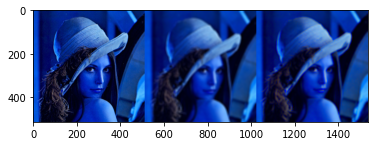

In [17]:
def smooth_rgb(o_image, k_size):
    image = np.copy(o_image)
    r, g, b = image[...,0], image[...,1], image[...,2]

    def smooth_comp(comp, k_size):
        c_rows, c_cols = comp.shape
        k_rows, k_cols = k_size, k_size

        pad_rows = (k_size - 1)
        pad_cols = (k_size - 1)

        padded_comp = np.pad(comp, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='reflect')

        output_comp = np.zeros_like(comp)

        for row in range(c_rows):
            for col in range(c_cols):
                output_comp[row, col] = np.sum(padded_comp[row : row + k_rows, col : col + k_cols]) / (k_rows * k_cols)
        return output_comp

    r_s, g_s, b_s = smooth_comp(r, k_size), smooth_comp(g, k_size), smooth_comp(b, k_size)
    image[...,0], image[...,1], image[...,2] = r_s, g_s, b_s
    return image

def smooth_hsi(image,kernel_size):
  r,g,b = image[...,2], image[...,1], image[...,0]
  h,s,i = create_hsi(r,g,b)

  i_rows, i_cols = i.shape
  k_rows, k_cols = kernel_size, kernel_size

  pad_rows = (k_rows - 1) // 2
  pad_cols = (k_cols - 1) // 2
  padded_i = np.pad(i,((pad_rows,pad_rows), (pad_cols, pad_cols)), mode = 'reflect')

  blurred_i = np.zeros_like(i)

  for row in range(i_rows):
    for col in range(i_cols):
      blurred_i[row, col] = np.sum(padded_i[row : row + k_rows, col : col + k_cols]) / (k_rows * k_cols)

  return convert_hsi2rgb(h,s,blurred_i)


original_image = cv2.imread('Fig0638(a)(lenna_RGB).tif')
rgb = smooth_rgb(original_image,11)
hsi = smooth_hsi(original_image,11).astype(np.uint8)
plt.imshow(cv2.hconcat([original_image,rgb,hsi]));

# COLOR IMAGE SHARPENING

Same like grayscale image sharpening but we have multiple channels so use laplacian on multiple channels

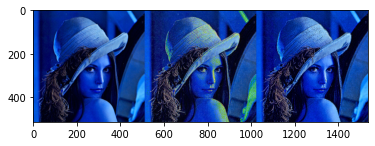

In [19]:
def sharp_rgb(o_image, kernel):
    image = np.copy(o_image)
    r, g, b = image[...,0], image[...,1], image[...,2]

    def sharp_comp(comp, kernel):
        c_rows, c_cols = comp.shape
        k_rows, k_cols = kernel.shape

        pad_rows = (k_rows - 1)
        pad_cols = (k_cols - 1)

        padded_comp = np.pad(comp, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='reflect')

        output_comp = np.zeros_like(comp)

        for row in range(c_rows):
            for col in range(c_cols):
                val = np.sum(kernel * padded_comp[row : row + k_rows, col : col + k_cols])
                output_comp[row,col] = 0 if val < 0  else val
        return output_comp

    r_s, g_s, b_s = sharp_comp(r, kernel), sharp_comp(g, kernel), sharp_comp(b, kernel)
    r = r + (1 * r_s)
    b = b + (1 * b_s)
    g = g + (1 * g_s)
    image[...,0], image[...,1], image[...,2] = r,g,b
    return image

def sharp_hsi(image,kernel):
  r,g,b = image[...,2], image[...,1], image[...,0]
  h,s,i = create_hsi(r,g,b)

  i_rows, i_cols = i.shape
  k_rows, k_cols = kernel.shape

  pad_rows = (k_rows - 1) // 2
  pad_cols = (k_cols - 1) // 2
  padded_i = np.pad(i,((pad_rows,pad_rows), (pad_cols, pad_cols)), mode = 'reflect')

  sharp_i = np.zeros_like(i)

  for row in range(i_rows):
    for col in range(i_cols):
      val = np.sum(kernel * padded_i[row : row + k_rows, col : col + k_cols])
      sharp_i[row, col] = 0 if val < 0 else val
  i = i + (1 *sharp_i)
  return convert_hsi2rgb(h,s,i)


original_image = cv2.imread('Fig0638(a)(lenna_RGB).tif')
kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
rgb = sharp_rgb(original_image,kernel)
hsi = sharp_hsi(original_image,kernel).astype(np.uint8)
plt.imshow(cv2.hconcat([original_image,rgb,hsi]))

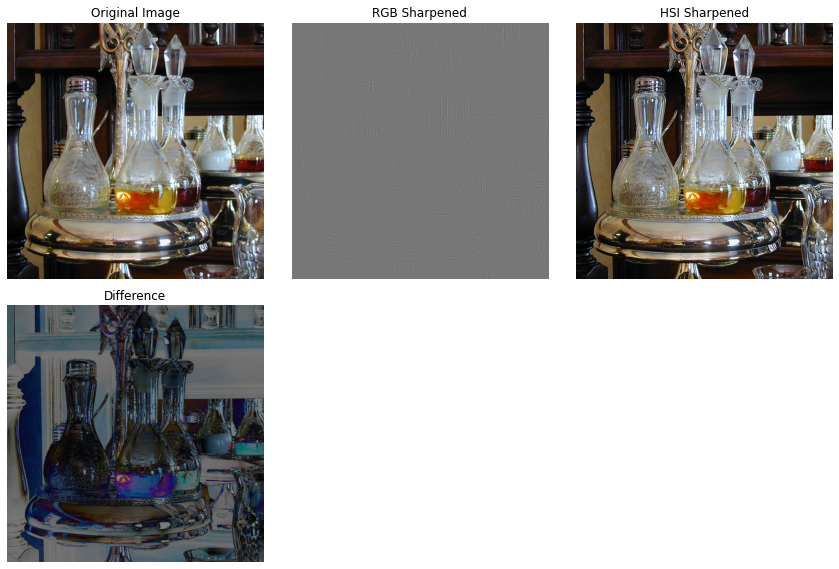

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to sharpen RGB image using Laplacian
def sharpen_rgb(image):
    # Convert image to float32 for calculations
    image = image.astype(np.float32)
    
    # Define Laplacian kernel for RGB
    kernel_rgb = np.array([[0, -1, 0],
                           [-1, 4, -1],
                           [0, -1, 0]], dtype=np.float32)
    
    # Split image into R, G, B components
    r, g, b = cv2.split(image)
    
    # Apply Laplacian kernel to each channel
    laplacian_r = cv2.filter2D(r, -1, kernel_rgb)
    laplacian_g = cv2.filter2D(g, -1, kernel_rgb)
    laplacian_b = cv2.filter2D(b, -1, kernel_rgb)
    
    # Combine sharpened channels
    sharpened_rgb = cv2.merge((laplacian_r, laplacian_g, laplacian_b))
    
    # Normalize output to [0, 255] and convert to uint8
    sharpened_rgb = cv2.normalize(sharpened_rgb, None, 0, 255, cv2.NORM_MINMAX)
    sharpened_rgb = sharpened_rgb.astype(np.uint8)
    
    return sharpened_rgb

# Function to sharpen HSI image using Laplacian on intensity component
def sharpen_hsi(image):
    # Convert image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, i = cv2.split(hsv_image)
    
    # Define Laplacian kernel for intensity (I) component
    kernel_intensity = np.array([[0, -1, 0],
                                 [-1, 5, -1],
                                 [0, -1, 0]], dtype=np.float32)
    
    # Apply Laplacian kernel to intensity component
    laplacian_i = cv2.filter2D(i, -1, kernel_intensity)
    
    # Combine sharpened intensity with original H and S components
    sharpened_hsi = cv2.merge((h, s, laplacian_i))
    
    # Convert back to RGB
    sharpened_hsi_rgb = cv2.cvtColor(sharpened_hsi, cv2.COLOR_HSV2BGR)
    
    # Normalize output to [0, 255] and convert to uint8
    sharpened_hsi_rgb = cv2.normalize(sharpened_hsi_rgb, None, 0, 255, cv2.NORM_MINMAX)
    sharpened_hsi_rgb = sharpened_hsi_rgb.astype(np.uint8)
    
    return sharpened_hsi_rgb

# Read the original image
original_image = cv2.imread('Fig0637(a)(caster_stand_original).tif')

# Sharpen RGB image
sharpened_rgb = sharpen_rgb(original_image)

# Sharpen HSI image
sharpened_hsi = sharpen_hsi(original_image)

# Compute difference between RGB and HSI sharpened images
difference_image = cv2.absdiff(sharpened_rgb, sharpened_hsi)

# Display the images
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(sharpened_rgb, cv2.COLOR_BGR2RGB))
plt.title('RGB Sharpened')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_hsi, cv2.COLOR_BGR2RGB))
plt.title('HSI Sharpened')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(difference_image, cv2.COLOR_BGR2RGB))
plt.title('Difference')
plt.axis('off')

plt.tight_layout()
plt.show()


# USING COLOR IN IMAGE SEGMENTATION
SEGMENTATION IN HSI COLOR SPACE

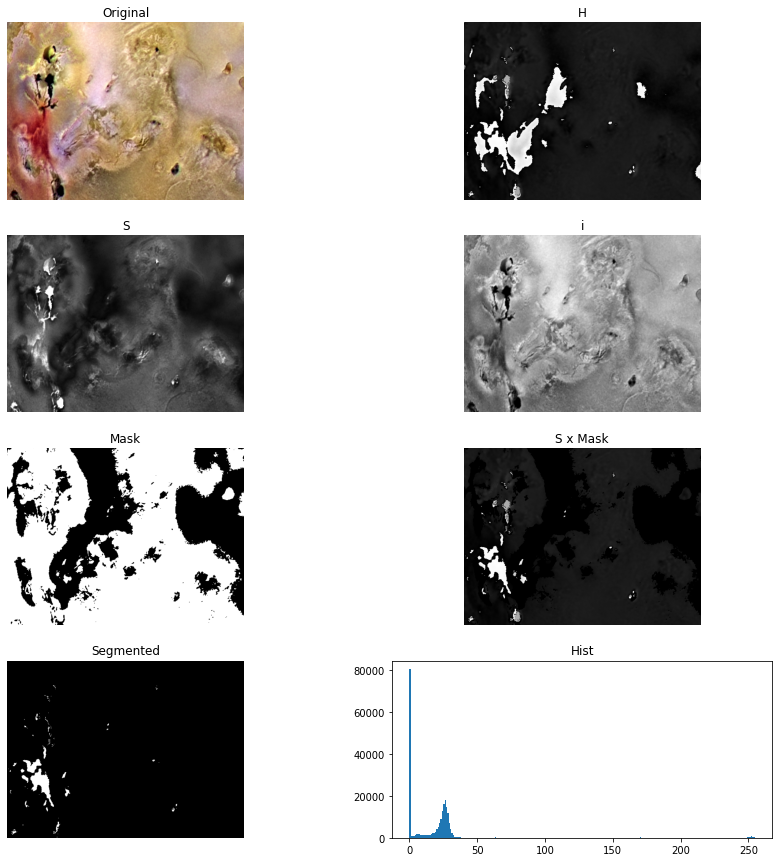

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def show(height,width,images, titles):
  plt.figure(figsize = (15,15))
  flag = False
  for i in range(len(images)):
    if i == 6:
      plt.subplot(height,width,i+1)
      plt.imshow(images[i], cmap = 'gray')
      plt.title(titles[i])
      plt.axis('off')
      plt.subplot(height,width,i+2)
      plt.hist((images[i-1]).ravel(),255,[0,255])
      plt.title('Hist')
      plt.show()
    else:
      plt.subplot(height,width,i+1)
      plt.imshow(images[i], cmap = 'gray')
      plt.title(titles[i])
      plt.axis('off')

def create_hsi (image):
  r,g,b = image[...,2] / 255, image[...,1] / 255, image[...,0] / 255,
  # H
  numerator = ((r-g) + (r-b)) / 2
  denominator = np.sqrt(0.0000001+((np.power(r-g,2))+((r-b)*(g-b))))
  theta = numerator / (denominator + 1e-15 )
  theta = np.degrees(np.arccos(theta))
  h = np.zeros_like(theta)
  h[b <= g] = theta[b <= g]
  h[b > g] = 360 - theta[b > g]
  h = (h / 360)
  h = np.clip(h,0,1)
  h *= 255

  # S
  denom = r + g + b
  min_rgb = np.minimum.reduce([r,g,b])
  s = 1 - (3 / (denom + 1e-10)) * min_rgb
  s = np.clip(s,0,1)
  s *= 255

  # I
  i = (r + g + b) / 3
  i = np.clip(i,0,1)
  i *= 255

  return [h.astype(np.uint8),s.astype(np.uint8),i.astype(np.uint8)]

# Convert HSI to RGB
def convert_hsi2rgb(hue,sat,inten):
  hue = (hue / 255) * 360
  sat = sat / 255
  inten = inten / 255
  r,g,b = np.zeros_like(hue),np.zeros_like(hue),np.zeros_like(hue)
  for x in range(hue.shape[0]):
    for y in range(hue.shape[1]):
      h = hue[x,y]
      s = sat[x,y]
      i = inten[x,y]
      if h >= 0 and h < 120:
        b[x,y] = i * (1-s)
        r[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        g[x,y] = (3*i) - (r[x,y] + b[x,y])
      elif h >= 120 and h < 240:
        h = h - 120
        r[x,y] = i * (1-s)
        g[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        b[x,y] = (3*i) - (r[x,y] + g[x,y])
      else:
        h = h - 240
        g[x,y] = i * (1-s)
        b[x,y] = i *(1 + ((s*np.cos(np.radians(h))) / np.cos(np.radians(60-h))))
        r[x,y] = (3*i) - (b[x,y] + g[x,y])

  r , g , b = np.clip(r,0,1) * 255, np.clip(g,0,1) * 255, np.clip(b,0,1) * 255
  return np.stack((b,g,r),axis = -1)


original_image = cv2.imread('Fig0642(a)(jupiter_moon_original).tif')
h,s,i = create_hsi(original_image)
# mask of saturation
mask = np.where((s < 50),0,255)
# product of sat mask and hue
prod_res = ((h/255) * (mask/255)) * 255
seg = np.where((prod_res < 229),0,255)
original_image = original_image[...,::-1]
images = [original_image,h,s,i,mask,prod_res,seg]
titles = ['Original','H','S','i','Mask','S x Mask','Segmented','Hist']
show(4,2,images,titles)

SEGMENTATION IN RGB

In [9]:
original_image = cv2.imread('Fig0642(a)(jupiter_moon_original).tif')
rgb_color = np.full((1,1,3),[0.1922,0.1608,0.6863])
cube_width = 0.2549
sphere_radius = 0.1765

def color_slicing_cube(image,width,prot_color):
  image = image / 255
  diff = np.abs(image - prot_color)
  mask = np.any(diff > (width / 2), axis=-1, keepdims=True)
  output_image = np.where(mask, 0, image)
  # This is true but in above code we make simpler it
  # output_image = np.where((np.any(np.abs(image - prot_color) > (width / 2), axis = -1, keepdims = True)),0.5,image)
  return output_image * 255
mask = color_slicing_cube(original_image, cube_width, rgb_color)
mask = np.where(mask != 0)

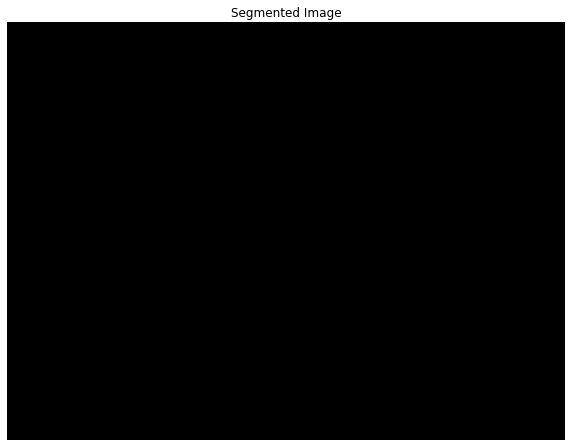

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_image = cv2.imread('Fig0642(a)(jupiter_moon_original).tif')

# Convert BGR image to RGB
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Define the prototype color and parameters
rgb_color = np.array([0.1922, 0.1608, 0.6863]).reshape((1, 1, 3))
cube_width = 0.2549

def color_slicing_cube(image, width, prot_color):
    image = image / 255.0  # Normalize the image
    diff = np.abs(image - prot_color)
    mask = np.all(diff <= (width / 2), axis=-1)
    output_image = np.where(mask[:, :, np.newaxis], image, 0)
    return output_image * 255  # Convert back to 0-255 range

# Apply the color slicing
segmented_image = color_slicing_cube(original_image, cube_width, rgb_color).astype(np.uint8)

# Display the result using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(segmented_image)
plt.axis('off')  # Hide axis
plt.title('Segmented Image')
plt.show()


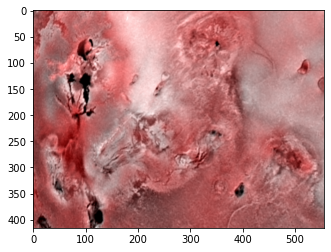

In [17]:
import skimage.color as skcolor
import matplotlib.pyplot as plt
original_image = cv2.imread('Fig0642(a)(jupiter_moon_original).tif')

def thres_colors(h_comp,colors):
  thresh1 = np.all((h_comp >= 0) & (h_comp < 32), axis = 1)
  thresh2 = np.all((h_comp >= 32) & (h_comp < 64), axis = 1)
  thresh3 = np.all((h_comp >= 64) &( h_comp < 96), axis = 1)
  thresh4 = np.all((h_comp >= 96 )&( h_comp < 127), axis = 1)
  thresh5 = np.all((h_comp >= 127 )&( h_comp < 158), axis = 1)
  thresh6 = np.all((h_comp >= 158 )&( h_comp < 189), axis = 1)
  thresh7 = np.all((h_comp >= 189 )&( h_comp < 120), axis = 1)
  thresh8 = np.all((h_comp >= 222 )&( h_comp < 255), axis = 1)
  h_cus = np.zeros_like(h_comp)
  threshs = [thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7,thresh8]
  for i in range(len(colors)):
    h_cus[threshs[i]] = colors[i]
  return h_cus


hsi_image = skcolor.rgb2hsv(original_image)
h = hsi_image[:,:,0] * 255
colors = [0,10,69,240,140,190,220,255]
h_cus = thres_colors(h,colors)
hsi_image[:,:,0] = h_cus
rgb_image = skcolor.hsv2rgb(hsi_image)
plt.imshow(rgb_image);

COLOR EDGE DETECTION

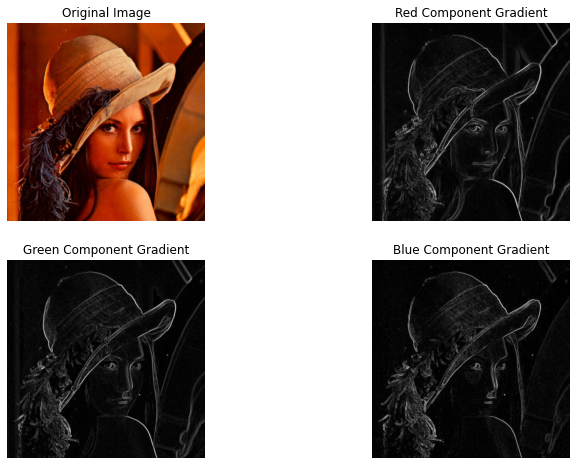

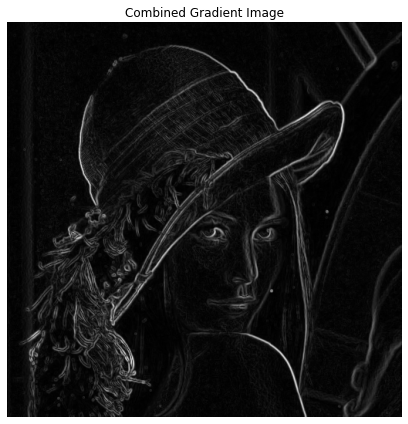

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('Fig0638(a)(lenna_RGB).tif')

# Convert BGR image to RGB for correct color display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Compute the gradients for each color component
def compute_gradients(image_channel):
    grad_x = cv2.Sobel(image_channel, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image_channel, cv2.CV_64F, 0, 1, ksize=3)
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    return gradient_magnitude

# Compute gradients for R, G, and B channels
grad_r = compute_gradients(image_rgb[:,:,0])
grad_g = compute_gradients(image_rgb[:,:,1])
grad_b = compute_gradients(image_rgb[:,:,2])

# Combine the gradients
combined_gradient = grad_r + grad_g + grad_b

# Normalize the combined gradient to the range [0, 255]
combined_gradient = (combined_gradient / np.max(combined_gradient) * 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(grad_r, cmap='gray')
plt.title('Red Component Gradient')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(grad_g, cmap='gray')
plt.title('Green Component Gradient')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(grad_b, cmap='gray')
plt.title('Blue Component Gradient')
plt.axis('off')

plt.figure(figsize=(6, 6))
plt.imshow(combined_gradient, cmap='gray')
plt.title('Combined Gradient Image')
plt.axis('off')

plt.tight_layout()
plt.show()
